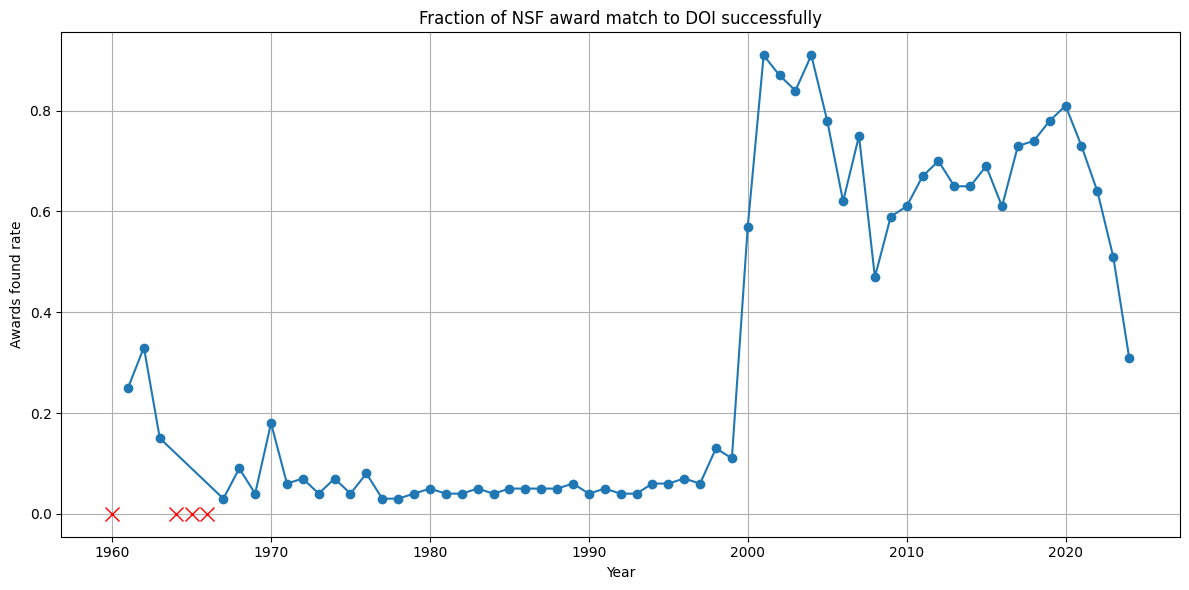

In [24]:
# code to draw fraction of NSF awards found over time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

all_data = {}

first_file = "doi_found_rates.csv"
df = pd.read_csv(first_file)
for _, row in df.iterrows():
    year = int(row['year']) 
    fraction = row['found_rate']
    all_data[year] = { "rate": fraction }

df_plot = pd.DataFrame.from_dict(all_data, orient='index')
df_plot.index.name = 'Year'
df_plot = df_plot.sort_index()

plt.figure(figsize=(12, 6))


nonzero = df_plot['rate'] != 0
plt.plot(df_plot.index[nonzero], df_plot['rate'][nonzero], marker='o', linestyle='-')
zero = df_plot['rate'] == 0
plt.plot(df_plot.index[zero], np.zeros(sum(zero)), marker='x', linestyle='None', color='red', markersize=10)
plt.title("Fraction of NSF award match to DOI successfully")
plt.xlabel("Year")
plt.ylabel("Awards found rate")
plt.grid(True)
plt.tight_layout()
plt.savefig("fraction_found_overtime.png", dpi=300, bbox_inches='tight')
plt.show()


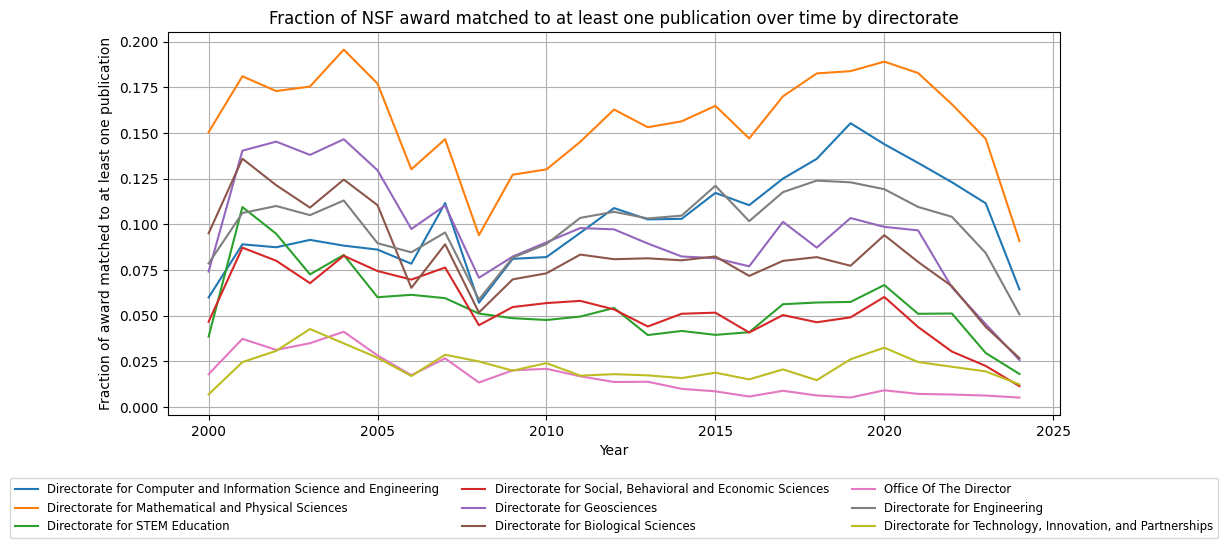

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

all_data = {}

for year in range(2000, 2025):

    df = pd.read_csv(f"Merged/merge{year}.csv", low_memory=False)
    orgs = set(df['org_dir_long_name'].dropna().unique())
    total_amount = len(set(df['awd_id']))

    df_valid = df[df['doi'].notna() & (df['doi'].astype(str).str.strip() != '')]
    awards_with_pub = set(df_valid['awd_id'])

    for org_name in orgs:
        org_awards = df[df['org_dir_long_name'] == org_name]['awd_id'].unique()
        matched_awards = [aid for aid in org_awards if aid in awards_with_pub]
        found_count = len(set(matched_awards))
        found_rate = found_count / total_amount

        if org_name not in all_data:
            all_data[org_name] = {}
        all_data[org_name][year] = found_rate


df_plot = pd.DataFrame(all_data).sort_index()
df_plot.index.name = 'Year'
df_plot = df_plot.fillna(0)

filtered_orgs = df_plot.columns[(df_plot > 0.01).any()]
df_filtered = df_plot[filtered_orgs]

plt.figure(figsize=(12, 6))
for col in df_filtered.columns:
    # Remove marker='o' to remove dots
    plt.plot(df_filtered.index, df_filtered[col], label=col)

plt.title("Fraction of NSF award matched to at least one publication over time by directorate")
plt.xlabel("Year")
plt.ylabel("Fraction of award matched to at least one publication")

# Move legend below the plot, centered, with multiple columns
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize='small')

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend
plt.grid(True)
plt.savefig("testing.png", dpi=300, bbox_inches='tight')
plt.show()
